# Task 3: Training a Variational Autoencoder on MNIST


In [1]:
#imports
import numpy as np
from sw.vae import *

## Download and scale MNIST dataset

In [2]:
train_data, test_data = tfk.datasets.mnist.load_data()
scale = 1/255
num_chan = 1
x_train, x_test, input_shape = generate_nmist_data(train_data,test_data,num_chan,scale)
img_h, img_w, num_chan = input_shape

## VAE - Variational Autoencoder

In [3]:
# Encoder and decoder NN have the same architecture
units = 256 #Data points for one sample
latent_dim = 2
lr = 1e-3 # learning rate
batch_size = 32
validation_split = 0.2

epochs = [1,5,25,50]

## Train VAE - Variational Autoencoder, epoch = 1

In [4]:
vae_obj, encoder, decoder = vae(units,latent_dim,lr,input_shape)
train_model(vae_obj,epochs[0],batch_size,x_train,x_test)

2021-12-23 21:14:53.674583: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 261s 139ms/step - loss: 0.2301 - val_loss: 0.2187


## Train VAE - Variational Autoencoder, epoch = 5

In [10]:
vae_obj, encoder, decoder = vae(units,latent_dim,lr,input_shape)
train_model(vae_obj,epochs[1],batch_size,x_train,x_test)

Epoch 1/5
1875/1875 [==============================] - 243s 130ms/step - loss: 0.2297 - val_loss: 0.2191
Epoch 2/5
1875/1875 [==============================] - 244s 130ms/step - loss: 0.2185 - val_loss: 0.2210
Epoch 3/5
1875/1875 [==============================] - 255s 136ms/step - loss: 0.2147 - val_loss: 0.2133
Epoch 4/5
1875/1875 [==============================] - 266s 142ms/step - loss: 0.2138 - val_loss: 0.2201
Epoch 5/5
1875/1875 [==============================] - 258s 137ms/step - loss: 0.2134 - val_loss: 0.2138


## Train VAE - Variational Autoencoder, epoch = 25

In [ ]:
vae_obj, encoder, decoder = vae(units,latent_dim,lr,input_shape)
train_model(vae_obj,epochs[2],batch_size,x_train,x_test)

## Train VAE - Variational Autoencoder, epoch = 50

In [ ]:
vae_obj, encoder, decoder = vae(units,latent_dim,lr,input_shape)
train_model(vae_obj,epochs[3],batch_size,x_train,x_test)

## Classification via mean values:

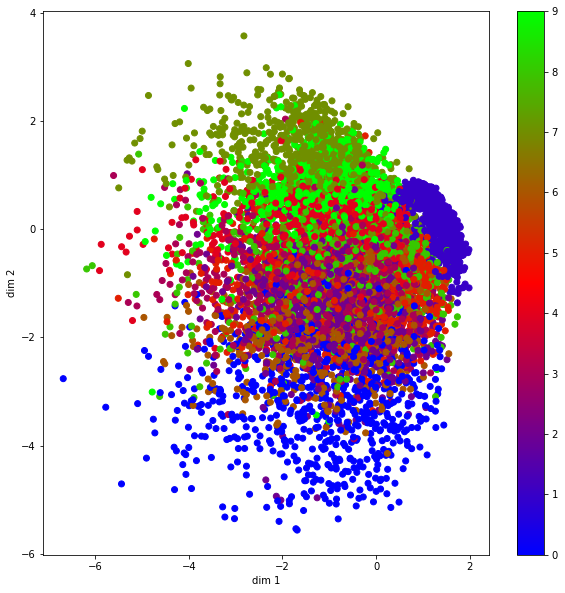

In [5]:
plot_mean_classification(x_test,test_data[1],encoder)

## Reconstruction plot:

/var/folders/ww/g5mppd_d60x1md9x4xsbpcpr0000gn/T/ipykernel_28612/1259612612.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


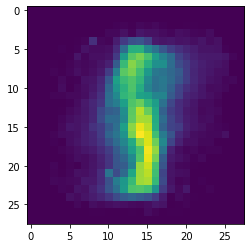

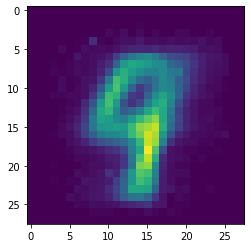

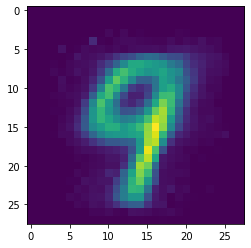

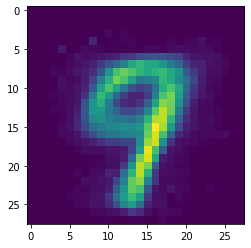

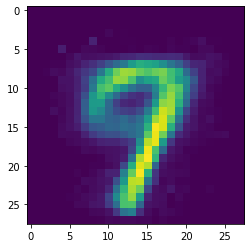

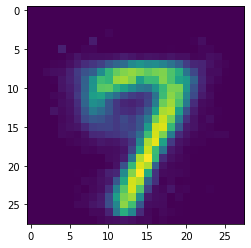

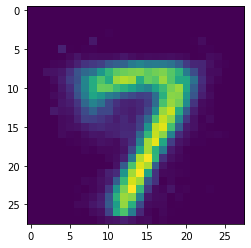

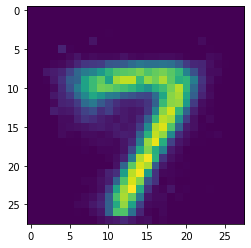

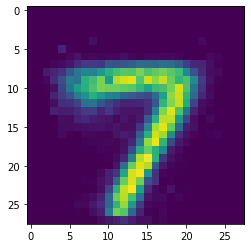

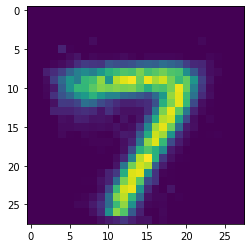

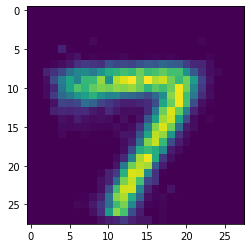

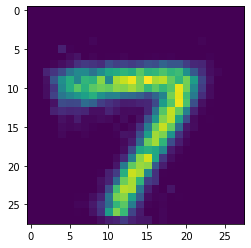

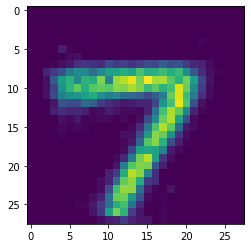

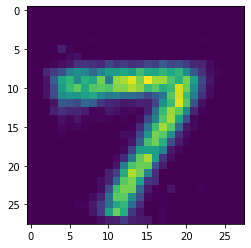

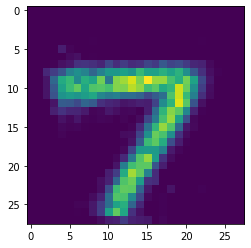

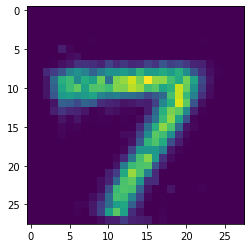

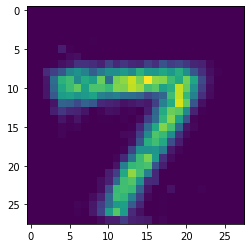

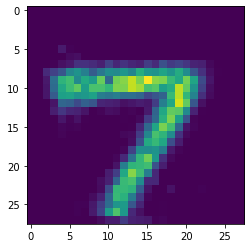

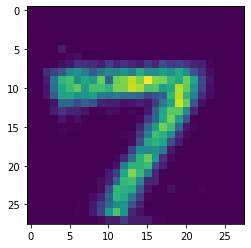

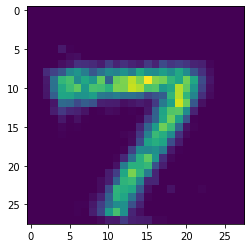

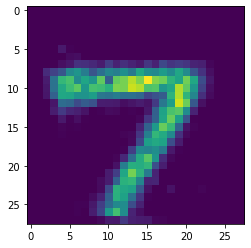

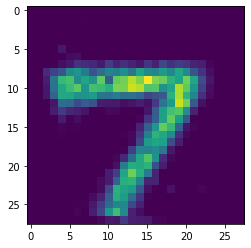

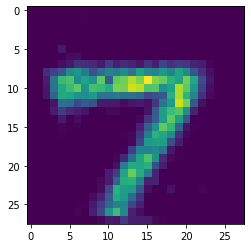

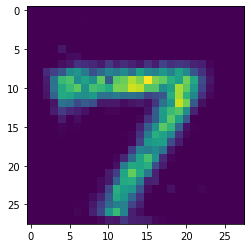

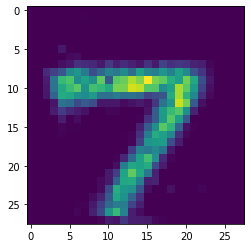

In [13]:
# Visualize images
#Single decoded image with random input latent vector (of size 1x2)
#Latent space range is about -5 to 5 so pick random values within this range
#Try starting with -1, 1 and slowly go up to -1.5,1.5 and see how it morphs from 
#one image to the other.
for i in np.arange(0,5,0.2):
    plt.figure()
    sample_vector = np.array([[-i,i]])
    decoded_example = decoder.predict(sample_vector)
    decoded_example_reshaped = decoded_example.reshape(img_w, img_h)
    plt.imshow(decoded_example_reshaped)

## Latent space plot

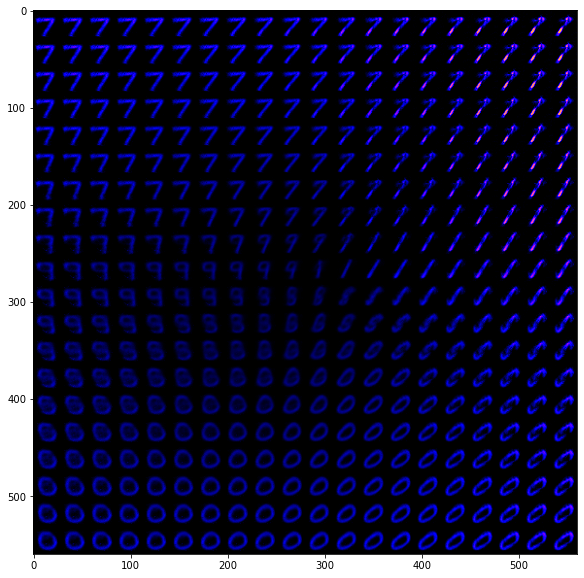

In [14]:
latent_space_plot(img_w,img_h,num_chan,decoder)

## Plot 15 reconstructed and original digits:

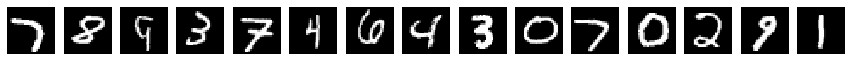

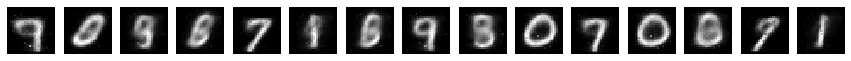

In [15]:
x = x_test[60:75]
xhat = vae_obj(x)

display_imgs(x)
display_imgs(xhat)